In [332]:
!ls

HackerMan.ipynb  firstSub.csv     secondSub.csv
data             fourthSub.csv    sixthSub.csv
fifthSub.csv     requirements.txt thirdSub.csv


In [333]:
!ls

HackerMan.ipynb  firstSub.csv     secondSub.csv
data             fourthSub.csv    sixthSub.csv
fifthSub.csv     requirements.txt thirdSub.csv


In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime

In [174]:
df = pd.read_csv("data/train.csv")
df.head()

,ID,DateTime,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,...,WindTx,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG
0,PR00001,07-12-2040 0:15,53.5,53.6,53.5,85,49.1,2,SSE,0.5,...,1,100.0,15,1,1,1,1,1,1,1
1,PR00002,07-12-2040 0:30,53.5,53.5,53.4,85,49.1,2,SSE,0.5,...,1,100.0,15,1,1,1,1,1,1,1
2,PR00003,07-12-2040 0:45,53.3,53.5,53.2,85,48.9,2,SSE,0.5,...,1,100.0,15,1,1,1,1,1,1,1
3,PR00004,07-12-2040 1:00,53.1,53.3,53.0,86,49.0,2,S,0.5,...,1,100.0,15,1,1,1,1,1,1,1
4,PR00005,07-12-2040 1:15,52.9,53.1,52.9,86,48.8,2,S,0.5,...,1,100.0,15,1,1,1,1,1,1,1


In [175]:
df["PA"].apply(np.log).head().apply(int)

0    0
1    0
2    0
3    0
4    0
Name: PA, dtype: int64

In [176]:
df["PA"].head()

0    1
1    1
2    1
3    1
4    1
Name: PA, dtype: int64

In [177]:
def parse(S):
    try:
        date_time_obj = datetime.datetime.strptime(S, "%m-%d-%Y %H:%M")
    except:
        try:
            date_time_obj = datetime.datetime.strptime(S, "%m/%d/%Y %H:%M")
            
            
        except:
            try:
                date_time_obj = datetime.datetime.strptime(S, "%m-%d-%Y %I:%M:%S %p")
            except:
                date_time_obj = datetime.datetime.strptime(S, "%m/%d/%Y %I:%M:%S %p")
            
    init = datetime.datetime.strptime("07-12-2040 0:15", "%m-%d-%Y %H:%M")
    return ((date_time_obj-init).total_seconds())//(15*60)

df["ex"] = df["DateTime"].apply(parse)
X = df[(df["ex"]<40000) & (df["ex"]>25000)][["ex"]]


In [178]:
Ya = df[(df["ex"]<40000) & (df["ex"]>25000)]["PA"].apply(np.log)
Yb = df[(df["ex"]<40000) & (df["ex"]>25000)]["PB"].apply(np.log)
Yc = df[(df["ex"]<40000) & (df["ex"]>25000)]["PC"].apply(np.log)
Yd = df[(df["ex"]<40000) & (df["ex"]>25000)]["PD"].apply(np.log)
Ye = df[(df["ex"]<40000) & (df["ex"]>25000)]["PE"].apply(np.log)
Yf = df[(df["ex"]<40000) & (df["ex"]>25000)]["PF"].apply(np.log)
Yg = df[(df["ex"]<40000) & (df["ex"]>25000)]["PG"].apply(np.log)
Yg.head()

26846    3.367296
26847    3.367296
26848    3.367296
26849    3.367296
26850    3.367296
Name: PG, dtype: float64

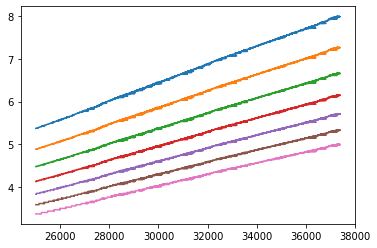

In [179]:
plt.plot(X, Ya)
plt.plot(X, Yb)
plt.plot(X, Yc)
plt.plot(X, Yd)
plt.plot(X, Ye)
plt.plot(X, Yf)
plt.plot(X, Yg)
plt.show()

In [180]:
reg = LinearRegression()
reg.fit(X, Ya)
reg.coef_

array([0.00021371])

In [181]:
dftest = pd.read_csv("data/ test.csv")
dfres = pd.DataFrame()
dfres["ID"] = dftest["ID"]

len(dftest)

22446

In [182]:
dftest["ex"] =  dftest["DateTime"].apply(parse)
Xtest = dftest[["ex"]]

In [183]:
dfres["PA"] = reg.predict(Xtest)
dfres["PA"] = dfres["PA"].apply(np.exp).apply(int)
dfres["PA"] = dfres["PA"] + 7
dfres["PA"].head()

0    2980
1    2981
2    2981
3    2982
4    2983
Name: PA, dtype: int64

In [184]:
reg = LinearRegression()
reg.fit(X, Yb)
reg.coef_

array([0.00019428])

In [185]:
dfres["PB"] = reg.predict(Xtest)
dfres["PB"] = dfres["PB"].apply(np.exp).apply(int)
dfres["PB"] = dfres["PB"] + 4
dfres["PB"].head()

0    1441
1    1441
2    1441
3    1442
4    1442
Name: PB, dtype: int64

In [186]:
reg = LinearRegression()
reg.fit(X, Yc)
print(reg.coef_)
dfres["PC"] = reg.predict(Xtest)
dfres["PC"] = dfres["PC"].apply(np.exp).apply(int)
dfres["PC"] = dfres["PC"] + 2
dfres["PC"].head()

[0.0001781]


0    786
1    786
2    786
3    786
4    786
Name: PC, dtype: int64

In [187]:
reg = LinearRegression()
reg.fit(X, Yd)
print(reg.coef_)
dfres["PD"] = reg.predict(Xtest)
dfres["PD"] = dfres["PD"].apply(np.exp).apply(int)
dfres["PD"] = dfres["PD"] + 1
dfres["PD"].head()

[0.00016439]


0    470
1    470
2    470
3    470
4    470
Name: PD, dtype: int64

In [188]:
reg = LinearRegression()
reg.fit(X, Ye)
print(reg.coef_)
dfres["PE"] = reg.predict(Xtest)
dfres["PE"] = dfres["PE"].apply(np.exp).apply(int)
dfres["PE"] = dfres["PE"] + 1
dfres["PE"].head()

[0.00015264]


0    303
1    303
2    303
3    303
4    303
Name: PE, dtype: int64

In [189]:
reg = LinearRegression()
reg.fit(X, Yf)
print(reg.coef_)
dfres["PF"] = reg.predict(Xtest)
dfres["PF"] = dfres["PF"].apply(np.exp).apply(int)
dfres["PF"] = dfres["PF"] + 1
dfres["PF"].head()

[0.00014249]


0    207
1    207
2    207
3    207
4    207
Name: PF, dtype: int64

In [190]:
reg = LinearRegression()
reg.fit(X, Yg)
print(reg.coef_)
dfres["PG"] = reg.predict(Xtest)
dfres["PG"] = dfres["PG"].apply(np.exp).apply(int)
dfres["PG"] = dfres["PG"] - 0
dfres["PG"].head()

[0.00013359]


0    148
1    148
2    148
3    148
4    148
Name: PG, dtype: int64

In [191]:
dfres = dfres.set_index("ID")
dfres.head()

,PA,PB,PC,PD,PE,PF,PG
ID,,,,,,,
PR40001,2980,1441,786,470,303,207,148
PR40002,2981,1441,786,470,303,207,148
PR40003,2981,1441,786,470,303,207,148
PR40004,2982,1442,786,470,303,207,148
PR40005,2983,1442,786,470,303,207,148


In [192]:
dfres.to_csv("eighthSub.csv")

In [193]:
df[["ID", "PA", "PB", "PC", "PD", "PE", "PF", "PG"]].tail()

,ID,PA,PB,PC,PD,PE,PF,PG
39995,PR39996,2978,1439,785,470,303,207,148
39996,PR39997,2979,1439,785,470,303,207,148
39997,PR39998,2979,1440,785,470,303,207,148
39998,PR39999,2980,1440,786,470,303,207,148
39999,PR40000,2980,1440,786,470,303,207,148


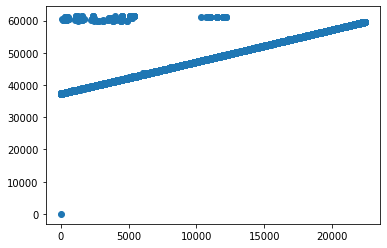

In [194]:
xp = list(range(22447))

yp = [0]
yp += list(dftest['ex'])


plt.scatter(xp, yp)